# NeqSim in jupyter

NeqSim can be run from jupyter by using the py4j python package. The JavaGateway must be started before the program can be run. Initially we connect to Java and import numpy and matplotlib for plotting.

In [1]:
import neqsim
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from neqsim.thermo import *
import pandas as pd

##Example 1 Setting up a thermodynamic calculation using NeqSim

In [2]:
thermoSystem = neqsim.thermo.system.SystemSrkEos(280.0,10.0)
thermoSystem.addComponent("methane", 10.0)
thermoSystem.addComponent("water", 4.0)

thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
thermoOps.TPflash()

#thermoSystem.display()

gasEnthalpy = thermoSystem.getPhase(0).getEnthalpy()

thermoSystem.initPhysicalProperties("Viscosity")
gasViscosity = thermoSystem.getPhase(0).getViscosity("kg/msec")

print("Gas enthalpy ", gasEnthalpy)
print("Gas viscosity ", gasViscosity)

Gas enthalpy  1079.4821290144282
Gas viscosity  1.0760998263782569e-05


##Example 2 Calculation of a phase envelope using NeqSim

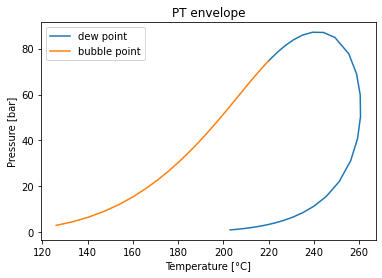

In [3]:
thermoSystem = neqsim.thermo.system.SystemSrkEos(280.0,10.0)
thermoSystem.addComponent("nitrogen", 1.0)
thermoSystem.addComponent("methane", 70.0)
thermoSystem.addComponent("ethane", 4.0)
thermoSystem.addComponent("propane", 2.0)
thermoSystem.addComponent("i-butane", 1.0)
thermoSystem.addComponent("n-butane", 1.0)

thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
thermoOps.calcPTphaseEnvelope()

plt.plot(list(thermoOps.getOperation().get("dewT")),list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot(list(thermoOps.getOperation().get("bubT")),list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [\u00B0C]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()

##Example 3 Calculation of hydrate equilibrium temperature using NeqSim

In [4]:
thermoSystem = neqsim.thermo.system.SystemSrkEos(280.0,60.0)
thermoSystem.addComponent("methane", 90.0)
thermoSystem.addComponent("ethane", 10.0)
thermoSystem.addComponent("propane", 1.0)
thermoSystem.addComponent("water", 4.0)
thermoSystem.setHydrateCheck(True);
thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
thermoOps.hydrateFormationTemperature()

print("Hydrate equilibrium temperature ", thermoSystem.getTemperature()-273.15, " C")

Hydrate equilibrium temperature  15.407359934325314  C


##Example 4 Oil characterization

gas density  74.03007867929414
oil density  712.1236932202198


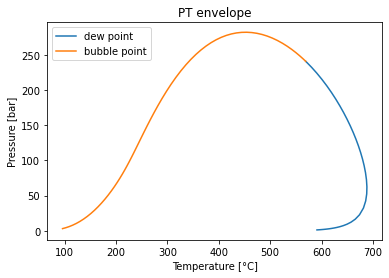

In [5]:
thermoSystem = neqsim.thermo.system.SystemSrkEos(280.0,60.0)
thermoSystem.addComponent("nitrogen", 2.0)
thermoSystem.addComponent("CO2", 1.0)
thermoSystem.addComponent("methane", 10.0)
thermoSystem.addComponent("ethane", 10.0)
thermoSystem.addComponent("propane", 1.0)
thermoSystem.addTBPfraction("C6", 0.428, 86.178 / 1000.0, 0.664);
thermoSystem.addTBPfraction("C7", 0.626, 96.00 / 1000.0, 0.738);
thermoSystem.addTBPfraction("C8", 0.609, 107.0 / 1000.0, 0.765);
thermoSystem.addTBPfraction("C9", 0.309, 121.0 / 1000.0, 0.781);
thermoSystem.addPlusFraction("C10", 5.137, 231.0 / 1000.0, 0.8301);
thermoSystem.getCharacterization().getLumpingModel().setNumberOfLumpedComponents(12);
thermoSystem.getCharacterization().characterisePlusFraction();
thermoSystem.setMixingRule(2)

thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
thermoOps.TPflash()

#thermoSystem.display()

thermoSystem.initPhysicalProperties("Density")
gasDensity = thermoSystem.getPhase("gas").getDensity("kg/m3")
oilDensity = thermoSystem.getPhase("oil").getDensity("kg/m3")

print("gas density ", gasDensity)
print("oil density ", oilDensity)

thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
thermoOps.calcPTphaseEnvelope()

plt.plot(list(thermoOps.getOperation().get("dewT")),list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot(list(thermoOps.getOperation().get("bubT")),list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [\u00B0C]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()

##Example 5 Process simulation

In [6]:
processEquipment = neqsim.processSimulation.processEquipment

testSystem = neqsim.thermo.system.SystemSrkEos((273.15+50.0),50.00);
testSystem.addComponent("methane", 900.00);
testSystem.addComponent("ethane", 200.00);
testSystem.addComponent("n-hexane", 200.0);
testSystem.addComponent("n-nonane", 200.0);
testSystem.addComponent("nC10", 20.0);
testSystem.addComponent("nC13", 10.0);
testSystem.setMixingRule(2);

stream_1 = processEquipment.stream.Stream("Stream1", testSystem);
        
mixerHP = processEquipment.mixer.StaticMixer("Mixer HP");
mixerHP.addStream(stream_1);
        
separator = processEquipment.separator.Separator("Separator 1", mixerHP.getOutStream());
        
LP_valve = processEquipment.valve.ThrottlingValve("LPventil", separator.getLiquidOutStream());
LP_valve.setOutletPressure(5.0);
        
LPseparator = processEquipment.separator.Separator("Separator 1", LP_valve.getOutStream());
        
LPcompressor = processEquipment.compressor.Compressor(LPseparator.getGasOutStream());
LPcompressor.setOutletPressure(50.0);
        
heaterLP =  processEquipment.heatExchanger.Heater(LPcompressor.getOutStream());
heaterLP.setOutTemperature(270.25);
        
stream_2 =  processEquipment.stream.Stream(heaterLP.getOutStream());
stream_2.setName("cooled gas");
        
gasScrubber = processEquipment.separator.GasScrubberSimple("Scrubber", stream_2);
        
stream_3 = processEquipment.stream.Stream(gasScrubber.getLiquidOutStream());
stream_3.setName("liq from scrubber gas");
        
mixerHP.addStream(stream_3);
        
mixer = processEquipment.mixer.StaticMixer("Mixer export");
mixer.addStream(separator.getGasOutStream());
mixer.addStream(gasScrubber.getGasOutStream());
        
HPcompressor = processEquipment.compressor.Compressor(mixer.getOutStream());
HPcompressor.setOutletPressure(200.0);
        
operations =  neqsim.processSimulation.processSystem.ProcessSystem();
operations.add(stream_1);
operations.add(mixerHP);
operations.add(separator);
operations.add(LP_valve);
operations.add(LPseparator);
operations.add(LPcompressor);
operations.add(heaterLP);
operations.add(stream_2);
operations.add(gasScrubber);
operations.add(stream_3);
operations.add(mixer);
operations.add(HPcompressor);
        
operations.run();

print("LP compressor power ", LPcompressor.getPower()/1000.0, " kW")
print("HP compressor power ", HPcompressor.getPower()/1000.0, " kW")

LP compressor power  2016.9539860081127  kW
HP compressor power  10027.680843485892  kW



##Example 6 Create pS and pH diagram

Text(0, 0.5, 'Entropy [kJ/kgK]')

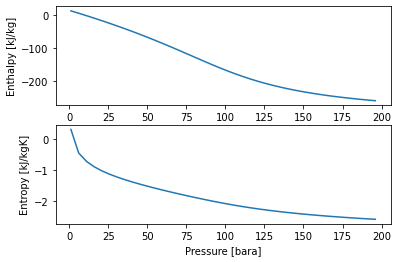

In [7]:
thermoSystem = neqsim.thermo.system.SystemSrkEos(280.0,10.0)
thermoSystem.addComponent("methane", 10.0)
thermoSystem.addComponent("ethane", 4.0)

thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
thermoOps.TPflash()

def enthalpy(P):
    thermoSystem.setPressure(P)
    thermoSystem.init(3)
    return thermoSystem.getEnthalpy("kJ/kg")

def entropy(P):
    thermoSystem.setPressure(P)
    thermoSystem.init(3)
    return thermoSystem.getEntropy("kJ/kgK")

pressure = np.arange(1.0, 200.0, 5.0)
enthalpy = [enthalpy(P) for P in pressure]
entropy = [entropy(P) for P in pressure]

plt.subplot(2, 1, 1)
plt.plot(pressure, enthalpy)
plt.xlabel('Pressure [bara]')
plt.ylabel('Enthalpy [kJ/kg]')

plt.subplot(2, 1, 2)
plt.plot(pressure, entropy)
plt.xlabel('Pressure [bara]')
plt.ylabel('Entropy [kJ/kgK]')
    

Example 7 Using the neqsim Python package (pip distribution neqsim)

In [8]:
import neqsim
from neqsim.thermo.thermoTools import *

fluid1 = fluid('srk')
fluid1.addComponent('methane',10.0)
fluid1.addComponent('n-heptane',2.0)
fluid1.addComponent('water',3.0)
fluid1.setMixingRule(2)
fluid1.setMultiPhaseCheck(True)
TPflash(fluid1)
show(fluid1)

In [9]:
fluid1 = fluid('srk')
fluid1.addComponent('methane',10.0)
fluid1.addComponent('n-heptane',2.0)
fluid1.setMixingRule(2)
TPflash(fluid1)

print('density ',fluid1.getPhase('gas').getDensity(),' kg/m3')

density  0.8659695521155993  kg/m3


In [10]:
fluid1 = fluid('srk')
fluid1.addComponent('n-heptane',49.39)
#fluid1.addComponent('methane',50.61)
fluid1.setMixingRule(2)
fluid1.setTemperature(267.12)
fluid1.setPressure(17.91)
#fluid1.useVolumeCorrection(True)
TPflash(fluid1)
fluid1.initPhysicalProperties()

print('density ',fluid1.getPhase('oil').getDensity(),' kg/m3')
print('conductivity ',fluid1.getPhase('oil').getConductivity())
fluid1.getPhase(0).getPhysicalProperties().setConductivityModel("PFCT");
fluid1.initPhysicalProperties()
print('conductivity ',fluid1.getPhase('oil').getConductivity())

density  617.2714448481995  kg/m3
conductivity  0.1232108098645149
conductivity  0.1232108098645149
